<a href="https://colab.research.google.com/github/udaygrover0/Spotify_Popularity_Prediction/blob/main/Spotify_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: I need to set up my Python environment for a data analysis and machine learning project. Please install the following libraries and their specific sub-modules: pandas, numpy, matplotlib, seaborn, plotly, tensorflow, scipy, and streamlit.

!pip install pandas numpy matplotlib seaborn plotly tensorflow scipy streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [69]:
# prompt: now import scikit-learn (including scaling numerical features, transforming different types of features, encoding categorical variables, and splitting into training and testing datasets)
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [144]:
data = pd.read_csv('/gdrive/MyDrive/deeplearning/spotify_songs.csv')

In [145]:
data.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [146]:
# prompt: I want to drop these columns from this dataset track_id, track_name, track_artist, track_album_id, track_album_release_date, playlist_id

data.drop(columns = ['track_id', 'track_name', 'track_artist',
                   'track_album_id', 'track_album_release_date', 'playlist_id', 'track_album_name','playlist_name'], inplace = True)
data.head()


track_popularity playlist_genre playlist_subgenre  danceability  energy  \
0                66            pop         dance pop         0.748   0.916   
1                67            pop         dance pop         0.726   0.815   
2                70            pop         dance pop         0.675   0.931   
3                60            pop         dance pop         0.718   0.930   
4                69            pop         dance pop         0.650   0.833   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    6    -2.634     1       0.0583        0.1020          0.000000    0.0653   
1   11    -4.969     1       0.0373        0.0724          0.004210    0.3570   
2    1    -3.432     0       0.0742        0.0794          0.000023    0.1100   
3    7    -3.778     1       0.1020        0.0287          0.000009    0.2040   
4    1    -4.672     1       0.0359        0.0803          0.000000    0.0833   

   valence    tempo  duration_ms  
0    0.518  122.036       194754  
1    0.693   99.972       162600  
2    0.613  124.008       176616  
3    0.277  121.956       169093  
4    0.725  123.976       189052

In [147]:
data.isnull().sum()

track_popularity     0
playlist_genre       0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64

In [148]:
for i in data.columns:
  print(i , data[i].nunique())

track_popularity 101
playlist_genre 6
playlist_subgenre 24
danceability 822
energy 952
key 12
loudness 10222
mode 2
speechiness 1270
acousticness 3731
instrumentalness 4729
liveness 1624
valence 1362
tempo 17684
duration_ms 19785


In [149]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder_genre = LabelEncoder()
label_encoder_subgenre = LabelEncoder()

# Fit the encoder and transform the playlist_genre column
data['playlist_genre_label'] = label_encoder_genre.fit_transform(data['playlist_genre'])

# Fit the encoder and transform the playlist_subgenre column
data['playlist_subgenre_label'] = label_encoder_subgenre.fit_transform(data['playlist_subgenre'])

# Output the label mapping for playlist_genre
genre_mapping = dict(zip(label_encoder_genre.classes_, label_encoder_genre.transform(label_encoder_genre.classes_)))
print("Playlist Genre Label Mapping:")
print(genre_mapping)

# Output the label mapping for playlist_subgenre
subgenre_mapping = dict(zip(label_encoder_subgenre.classes_, label_encoder_subgenre.transform(label_encoder_subgenre.classes_)))
print("Playlist Subgenre Label Mapping:")
print(subgenre_mapping)

Playlist Genre Label Mapping:
{'edm': 0, 'latin': 1, 'pop': 2, 'r&b': 3, 'rap': 4, 'rock': 5}
Playlist Subgenre Label Mapping:
{'album rock': 0, 'big room': 1, 'classic rock': 2, 'dance pop': 3, 'electro house': 4, 'electropop': 5, 'gangster rap': 6, 'hard rock': 7, 'hip hop': 8, 'hip pop': 9, 'indie poptimism': 10, 'latin hip hop': 11, 'latin pop': 12, 'neo soul': 13, 'new jack swing': 14, 'permanent wave': 15, 'pop edm': 16, 'post-teen pop': 17, 'progressive electro house': 18, 'reggaeton': 19, 'southern hip hop': 20, 'trap': 21, 'tropical': 22, 'urban contemporary': 23}


In [150]:
print(data[['playlist_genre', 'playlist_genre_label', 'playlist_subgenre', 'playlist_subgenre_label']].head())


  playlist_genre  playlist_genre_label playlist_subgenre  \
0            pop                     2         dance pop   
1            pop                     2         dance pop   
2            pop                     2         dance pop   
3            pop                     2         dance pop   
4            pop                     2         dance pop   

   playlist_subgenre_label  
0                        3  
1                        3  
2                        3  
3                        3  
4                        3  


In [151]:
data. head()


track_popularity playlist_genre playlist_subgenre  danceability  energy  \
0                66            pop         dance pop         0.748   0.916   
1                67            pop         dance pop         0.726   0.815   
2                70            pop         dance pop         0.675   0.931   
3                60            pop         dance pop         0.718   0.930   
4                69            pop         dance pop         0.650   0.833   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    6    -2.634     1       0.0583        0.1020          0.000000    0.0653   
1   11    -4.969     1       0.0373        0.0724          0.004210    0.3570   
2    1    -3.432     0       0.0742        0.0794          0.000023    0.1100   
3    7    -3.778     1       0.1020        0.0287          0.000009    0.2040   
4    1    -4.672     1       0.0359        0.0803          0.000000    0.0833   

   valence    tempo  duration_ms  playlist_genre_label  \
0    0.518  122.036       194754                     2   
1    0.693   99.972       162600                     2   
2    0.613  124.008       176616                     2   
3    0.277  121.956       169093                     2   
4    0.725  123.976       189052                     2   

   playlist_subgenre_label  
0                        3  
1                        3  
2                        3  
3                        3  
4                        3

In [152]:
data.drop(columns = ['playlist_genre','playlist_subgenre'], inplace = True)
data.head()

track_popularity  danceability  energy  key  loudness  mode  speechiness  \
0                66         0.748   0.916    6    -2.634     1       0.0583   
1                67         0.726   0.815   11    -4.969     1       0.0373   
2                70         0.675   0.931    1    -3.432     0       0.0742   
3                60         0.718   0.930    7    -3.778     1       0.1020   
4                69         0.650   0.833    1    -4.672     1       0.0359   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.1020          0.000000    0.0653    0.518  122.036       194754   
1        0.0724          0.004210    0.3570    0.693   99.972       162600   
2        0.0794          0.000023    0.1100    0.613  124.008       176616   
3        0.0287          0.000009    0.2040    0.277  121.956       169093   
4        0.0803          0.000000    0.0833    0.725  123.976       189052   

   playlist_genre_label  playlist_subgenre_label  
0                     2                        3  
1                     2                        3  
2                     2                        3  
3                     2                        3  
4                     2                        3

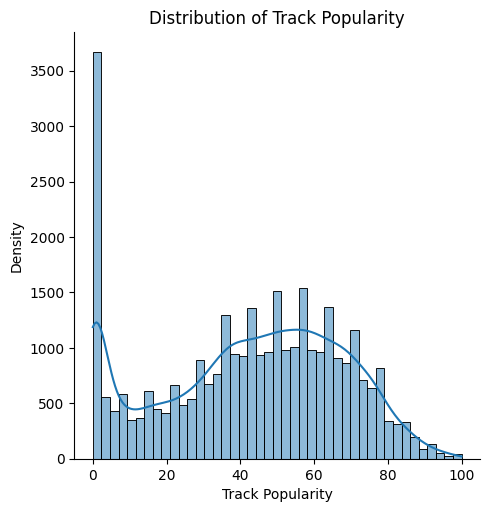

In [153]:
# prompt: I want you to make a visualisation to show distibution curve of track_popularity

sns.displot(data['track_popularity'], kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Density')
plt.show()

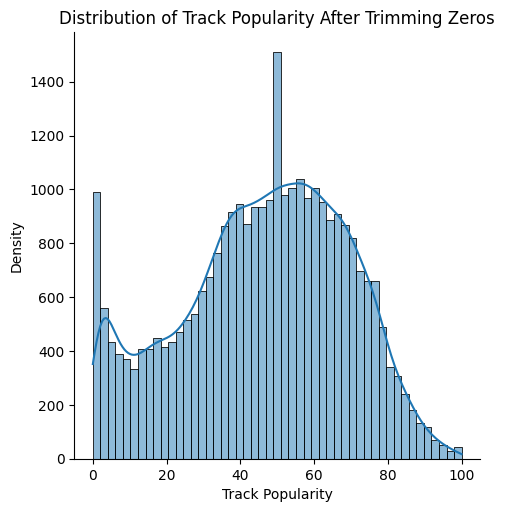

Shape after trimming: (30157, 15)


In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Separate rows with zero popularity
zero_popularity = data[data['track_popularity'] == 0]

# Determine the number of zeros to keep (e.g., 1% of the zeros)
keep_fraction = 0.01
keep_zeros = zero_popularity.sample(frac=keep_fraction, random_state=42)

# Combine the remaining zeros with the non-zero data
non_zero_popularity = data[data['track_popularity'] > 0]
trimmed_data = pd.concat([non_zero_popularity, keep_zeros])

# Update the original data with the trimmed data
data = trimmed_data

# Check the new distribution after trimming
sns.displot(data['track_popularity'], kde=True)
plt.title('Distribution of Track Popularity After Trimming Zeros')
plt.xlabel('Track Popularity')
plt.ylabel('Density')
plt.show()

print("Shape after trimming:", trimmed_data.shape)

In [155]:
data.shape

(30157, 15)

Model prep

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Include target variable in the dataset and define your full dataset as 'data'.

# Split the entire dataset, including the target variable
X_train, X_test = train_test_split(data, test_size=0.25, random_state=42)

In [157]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (22617, 15)
X_test shape: (7540, 15)


In [158]:
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

# Model


In [159]:
model = tf.keras.Sequential()

In [127]:
model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

In [160]:
# Hidden layers (with dropout layers for regularization)
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

# Output layer
model.add(tf.keras.layers.Dense(1, activation='linear'))

In [161]:
# Step 6: Compile the model
model.compile(
    loss='mean_squared_error',  # Use MSE for regression
    optimizer='adam',
    metrics=['mae']  # Mean Absolute Error as a metric
)

In [162]:
# Step 7: Fit the model
history = model.fit(X_train, X_train[:, -1],  # Last column is the target (track_popularity)
                    validation_data=(X_test, X_test[:, -1]),
                    epochs=70, batch_size=32)

Epoch 1/70
707/707 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0570 - mae: 0.1743 - val_loss: 0.0049 - val_mae: 0.0563
Epoch 2/70
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0104 - mae: 0.0772 - val_loss: 0.0034 - val_mae: 0.0467
Epoch 3/70
707/707 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0067 - mae: 0.0624 - val_loss: 0.0019 - val_mae: 0.0346
Epoch 4/70
707/707 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0059 - mae: 0.0588 - val_loss: 0.0028 - val_mae: 0.0431
Epoch 5/70
707/707 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0054 - mae: 0.0563 - val_loss: 0.0023 - val_mae: 0.0388
Epoch 6/70
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0051 - mae: 0.0541 - val_loss: 0.0030 - val_mae: 0.0432
Epoch 7/70
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0049 - mae: 0.0529 - val_loss: 0.0012 - val_mae: 0.0271
Epoch 8/70
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0048 - mae: 0.0519 - val_loss: 0.0011 - val_mae: 0.0232
Epoch 9/70
707/707 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - lo

In [163]:
# Step 8: Evaluate the model
model.evaluate(X_test, X_test[:, -1])

236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - mae: 0.0262


[0.0013340527657419443, 0.026074780151247978]

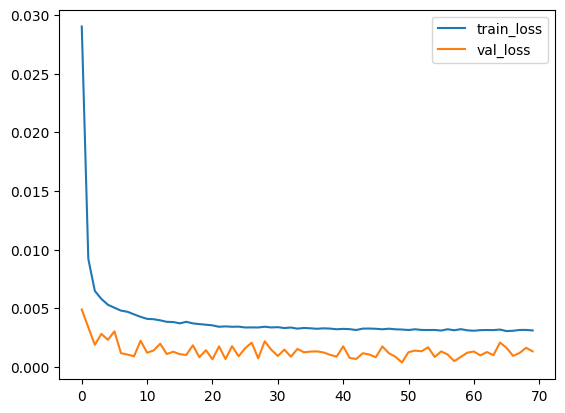

In [164]:
# Step 9: Plot the loss curves
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

Visualization

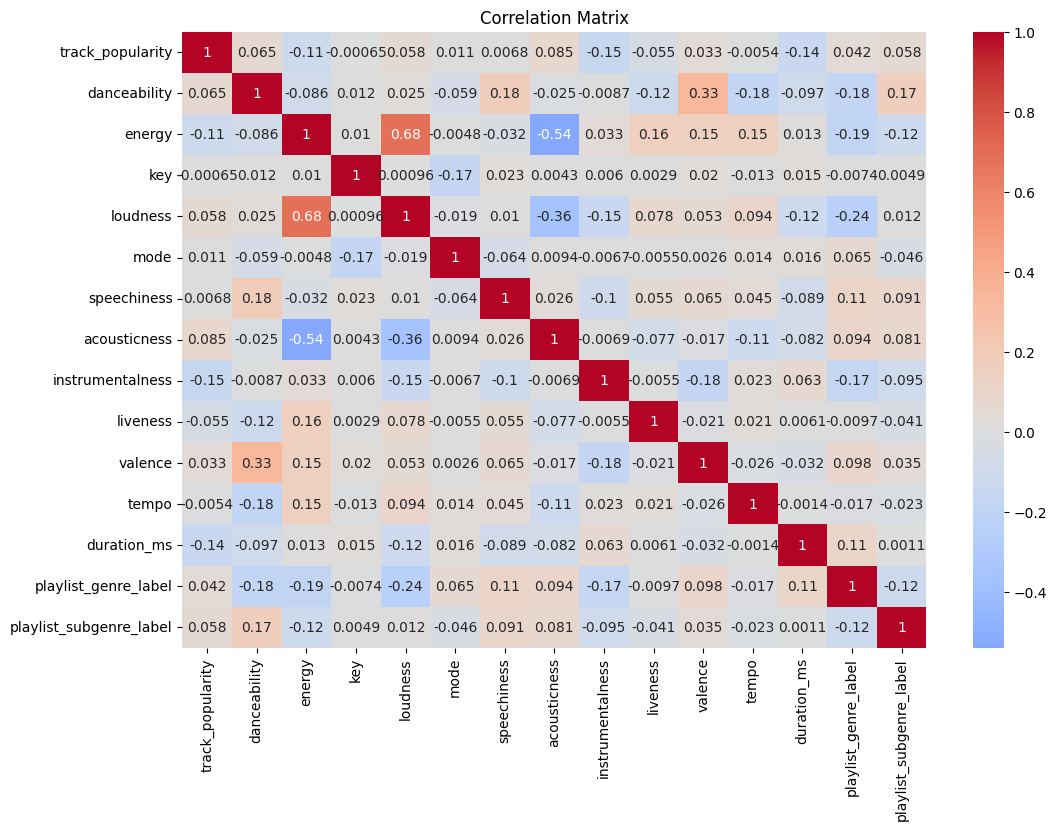

In [ ]:
# prompt: Create a heatmap to visualize the correlation matrix between all numerical features and the target variable, track_popularity. Highlight features with strong positive or negative correlation

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


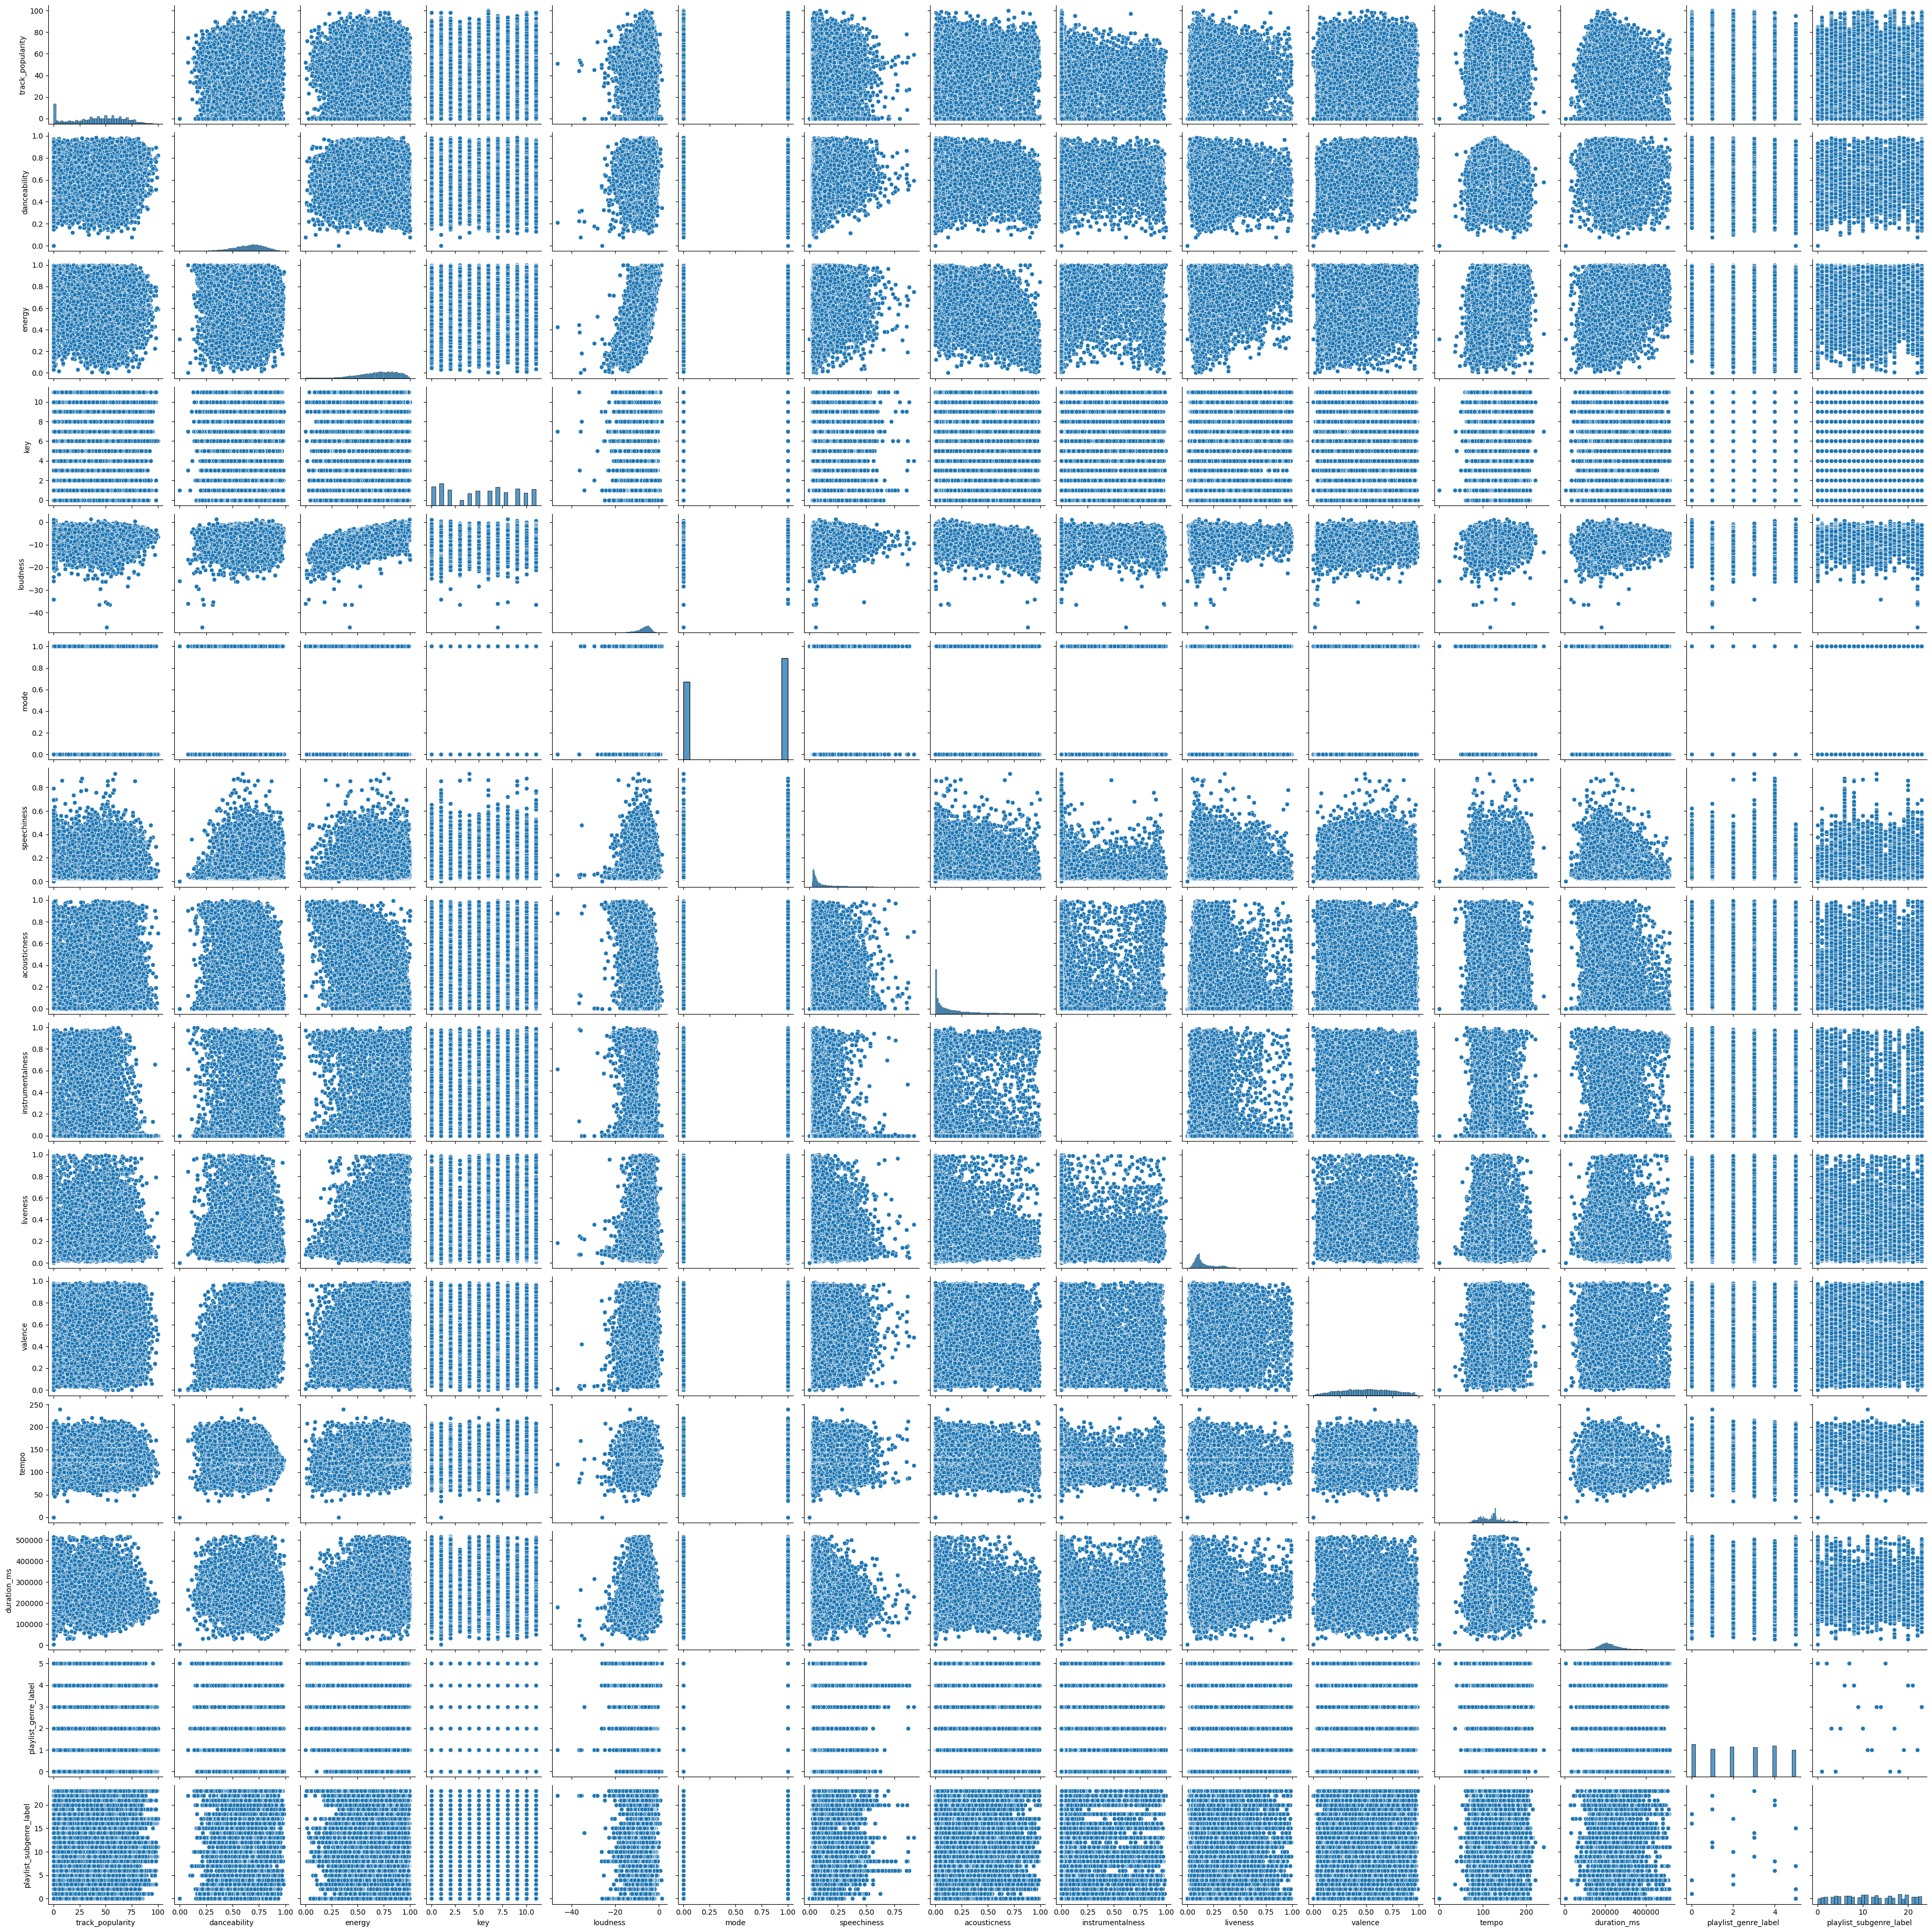

In [ ]:
# prompt: Generate a pair plot (scatterplot matrix) of the numerical features including track_popularity to visualize relationships and potential linear/non-linear associations

# Create a pair plot
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot
sns.pairplot(data, vars=['track_popularity', 'danceability', 'energy', 'key',
                         'loudness', 'mode', 'speechiness', 'acousticness',
                         'instrumentalness', 'liveness', 'valence', 'tempo',
                         'duration_ms', 'playlist_genre_label',
                         'playlist_subgenre_label'], kind='scatter')
plt.show()


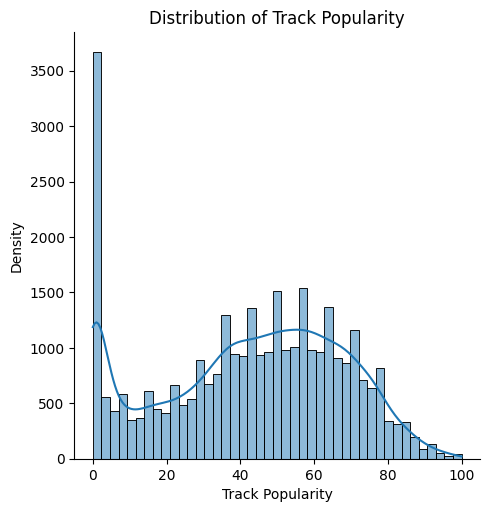

In [ ]:
# prompt: I want you to make a visualisation to show distibution curve of track_popularity

sns.displot(data['track_popularity'], kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Density')
plt.show()
